In [2]:
import numpy as np
import sympy as sym

import matplotlib.pyplot as plt
%matplotlib inline

# Señales de tiempo discreto

- Tiempo continuo
- valor continuo

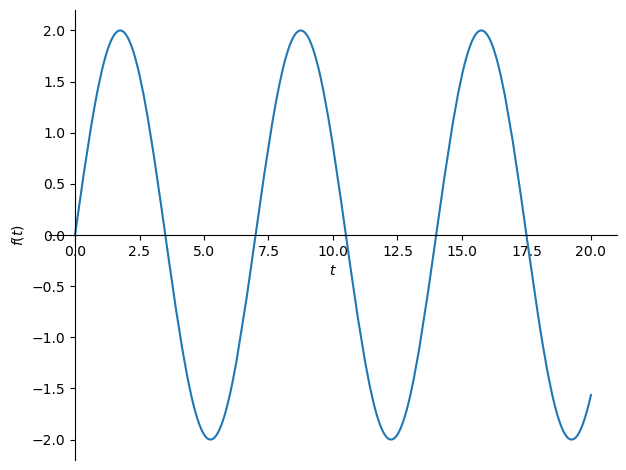

In [3]:
t = sym.symbols('t')
x_tc =  2*sym.sin(2*sym.pi*1*t/7)
g1 = sym.plot(x_tc,(t,0,20))


- Tiempo discreto
- valor continuo

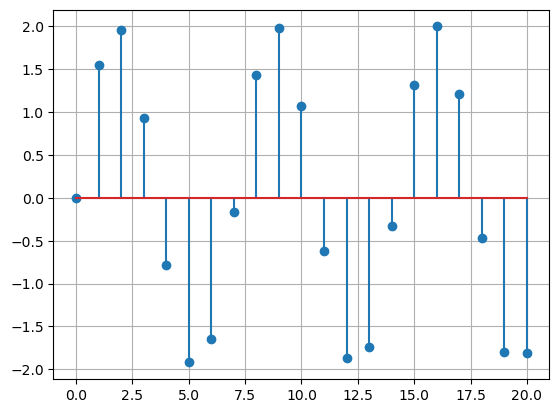

In [4]:
k = np.arange(21)
x_td = 2*np.sin(2*3.1*k/7)
g2 = plt.stem(k,x_td)
plt.grid()

- Tiempo discreto
- valor discreto

Estas señales son digitales

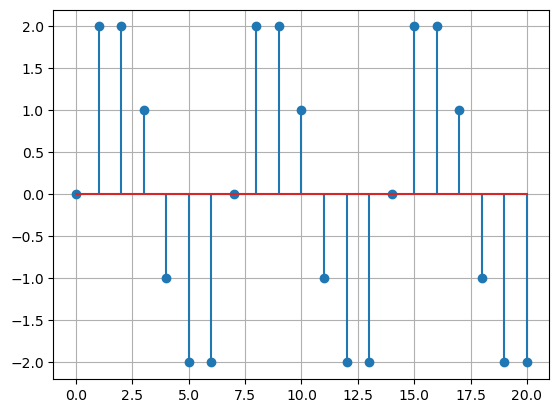

In [5]:
k = np.arange(21)
x_td = np.round(2*np.sin(2*np.pi*k/7))
g2 = plt.stem(k,x_td)
plt.grid()


## Señales estándar


Las señales $x(t)\in \mathbb{C}$ analizadas anteriormente se definen en tiempo continuo $t \in \mathbb{R}$.

Una señal en tiempo discreto $x[k] \in \mathbb{C}$ es una secuencia de valores que depende del índice $k \in \mathbb{Z}$.

Las señales $x(t)$ y $x[k]$ se relacionan mediante el teorema de muestreo según el cual$x[k] := x(k T)$.


Algunas [señales](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) desempeñan un rol importante en las aplicaciones del **procesamiento de señales**, **telecomunicaciones**, **control automático** y se usan para caracterizar las propiedades de los sistemas Lineales e Invariantes en el Tiempo (LTI).

A continuación se introducen e ilustran estas señales estándar.


### Exponencial compleja


La señal exponencial compleja en el dominio del tiempo discreto $k$ se define matemáticamente con la [función exponencial compleja](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)


\begin{equation}
x[k] = e^{(\Sigma + j \Omega) \, k} = z^k
\end{equation}


donde $z = e^{\Sigma + j \Omega}$ describe una frecuencia compleja con $z \in \mathbb{C}$ with $\Sigma, \Omega \in \mathbb{R}$. La exponencial compleja de tiempo discreto se relaciona con la de tiempo continuo $x(t) = e^{(\sigma + j \omega) t}$ por el teorema de muestreo. 


\begin{equation}
x[k] = x(k T) = e^{(\sigma + j \omega) k T} = e^{( \sigma T + j \omega T ) k}
\end{equation}

donde $T$ es el periodo de muestreo. Al analizar las expresiones para las señales puede observarse que $\Sigma = \sigma T$ y $\Omega = \omega T$. Por lo anterior se denomina *frecuencia normalizada* a $\Omega$. De acuerdo con [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula), la exponencial compleja puede reescribirse como:

\begin{equation}
x[k] = e^{\Sigma k} \cos[\Omega k] + j e^{\Sigma k} \sin[\Omega k]
\end{equation}

Las partes real $\Sigma$  e imaginaria $\Omega$ de $x[k]$ son senos y cosenos de frecuencia normalizada  modulando una exponencial. Observe que hay ambigüedad con los valores de frecuencia normalizada.

\begin{equation}
\cos[\Omega k] = \cos[(\Omega + n \cdot 2 \pi) \cdot k]
\end{equation}


con $n \in \mathbb{Z}$. $\Omega$ es única solamente si $-\pi < \Omega < \pi$. Así, la frecuencia normalizada $\Omega = \pm \pi$ representa las frecuencias más altas y más bajas posibles en el mundo de tiempo discreto.

$x[k]$ es periodica solamente si

\begin{equation}
x[k] = x[k + n \cdot N_\text{p}]
\end{equation}


Para $n \in \mathbb{Z}$ y $N_\text{p} \in \mathbb{N}$. Lo que obliga a que

\begin{equation}
N_\text{p} = \frac{2 \pi}{\Omega}
\end{equation}

Solamente $\Omega = \frac{2 \pi}{N_\text{p}}$ con $N_\text{p} \in \mathbb{N}$ es periodica con periodo $N_\text{p}$.

La señal, representada de forma polar es

\begin{equation}
x[k] = z^k = |z|^k \cdot e^{j \varphi(z) k}
\end{equation}


* exponencialmente decreciente si  $|z| < 1$ ($\Sigma < 0$)
* constante (1) si  $|z| < 1$ ($\Sigma = 1$)
* exponencialmente creciente si   $|z| > 1$ ($\Sigma < 0$)










**Ejemplo**


In [6]:

def exponential_signal(k, Sigma, Omega):
    return np.exp((Sigma + 1j * Omega) * k)


def plot_signal(k, x):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.stem(k, np.real(x))
    plt.xlabel('$k$')
    plt.ylabel(r'$\Re \{ x[k] \}$')

    plt.subplot(122)
    plt.stem(k, np.imag(x))
    plt.xlabel('$k$')
    plt.ylabel(r'$\Im \{ x[k] \}$')
    plt.tight_layout()

Un vector `x` con valores de la señal se define con los índices $k$, $\Sigma = 0.025$ y $\Omega = 0.5$. 

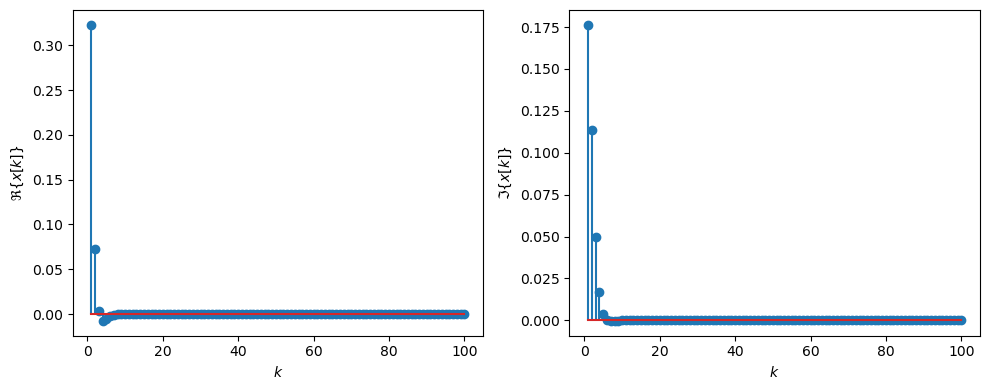

In [20]:
k = np.arange(1,101)
x = exponential_signal(k,-1,0.5)
plot_signal(k, x)

Una señal periodica

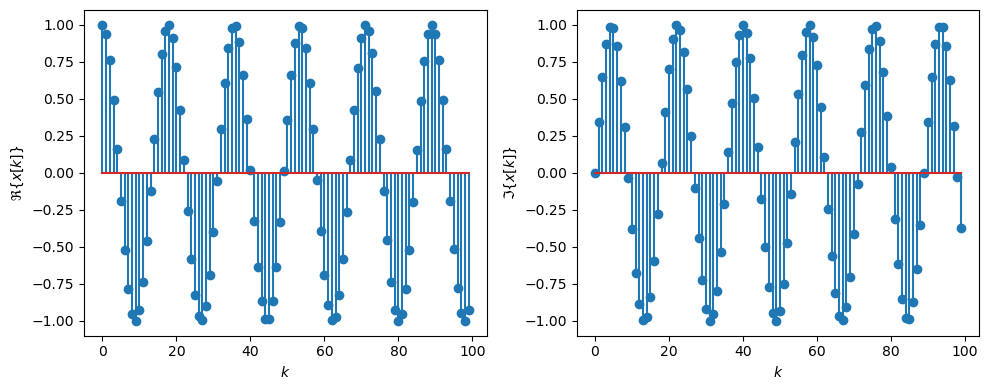

In [32]:
Np = 17
k = np.arange(0,100)

x = exponential_signal(k, 0, 2 * 3 / Np)
plot_signal(k, x)

Una señal no periodica

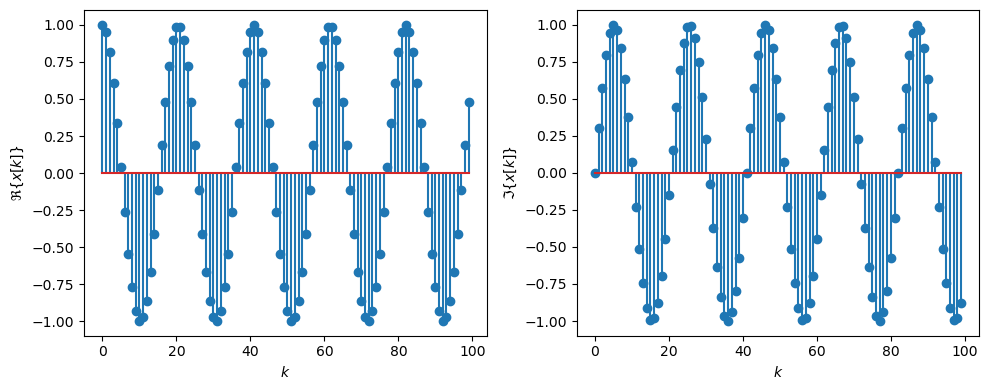

In [8]:
Np = 20.5
x = exponential_signal(k, 0, 2 * np.pi / Np)
plot_signal(k, x)

**Ejercicio**

* Defina valores para $\Sigma$  y $\Omega$ de manera que pueda crear señales decrecientes, constantes y crecientes con distinta frecuencia angular.
* Verifique la ambigüedad en las frecuencias al sumar múltiplos enteros de  $2 \pi$ a $\Omega$


In [9]:
## Escriba su código aquí


### Impulso de Dirac

 $\delta[k]$ no se obtiene al muestrear su versión de tiempo continuo. Se define como:
 
\begin{equation}
\delta[k] = \begin{cases}
1 & \text{for } k = 0 \\
0 & \text{otherwise}
\end{cases}
\end{equation}

Tambien se conoce como [*Kronecker delta*](https://en.wikipedia.org/wiki/Kronecker_delta) y mantiene las propiedades más importantes de la vrsión de tiempo continuo $\delta(t)$.

1. **Desplazamiento**
    \begin{equation}
    \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[k - \kappa] = x[k]
    \end{equation}
    The sifting property implies $\sum_{\kappa = -\infty}^{\infty} x[\kappa] = 1$.
    
2. **Multiplicación**
    \begin{equation}
    x[k] \cdot \delta[k - \kappa] = x[\kappa] \cdot \delta[k - \kappa]
    \end{equation}
    
3. **Linealidad**
    \begin{equation}
    a \cdot \delta[k] + b \cdot \delta[k] = (a+b) \cdot \delta[k]
    \end{equation}



**Ejemplo**

(-0.1, 1.1)

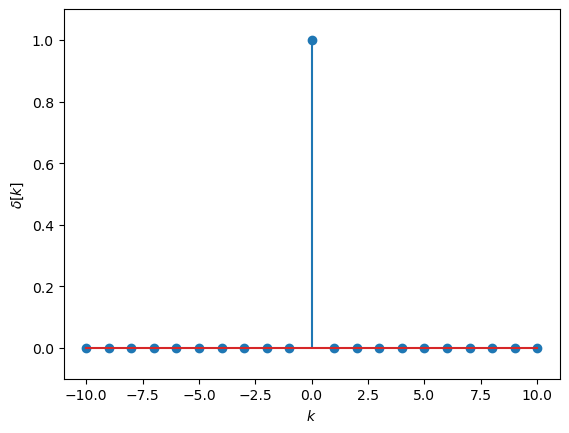

In [21]:
def dirac(k):
    return np.where(k == 0, 1.0, 0.0)


k = np.arange(-10, 11)
x = dirac(k)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\delta[k]$')
plt.ylim([-0.1, 1.1])

Propiedad de multiplicación

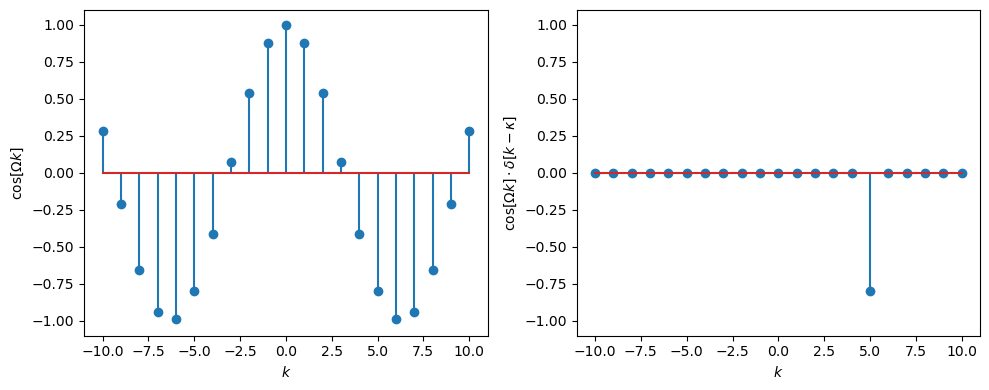

In [23]:
x = dirac(k-5)
y = np.cos(k*0.5)
w = x*y

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel(r'$\cos[\Omega k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(122)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$\cos[\Omega k] \cdot \delta[k - \kappa]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

### Escalón

\begin{equation}
\epsilon[k] = \begin{cases} 1 & k \geq 0 \\  0 & k < 0 \end{cases}
\end{equation}

Representa activaciones en momentos especificos. Se relaciona con el impulso mediante:

\begin{equation}
\epsilon[k] = \sum_{\kappa = -\infty}^{k} \delta[\kappa]
\end{equation}

Lo que implica que:

\begin{equation}
\delta[k] = \epsilon[k] - \epsilon[k-1]
\end{equation}

**Ejemplo**


(-0.1, 1.1)

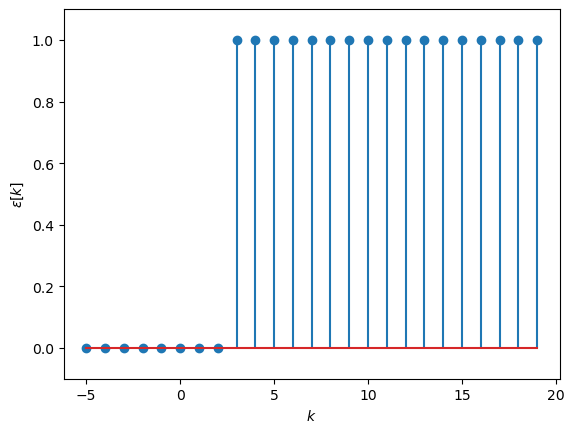

In [24]:
def heaviside(k):
    return np.where(k >= 0, 1.0, 0.0)


k = np.arange(-5, 20)
x = heaviside(k-3)

plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\epsilon[k]$')
plt.ylim([-0.1, 1.1])

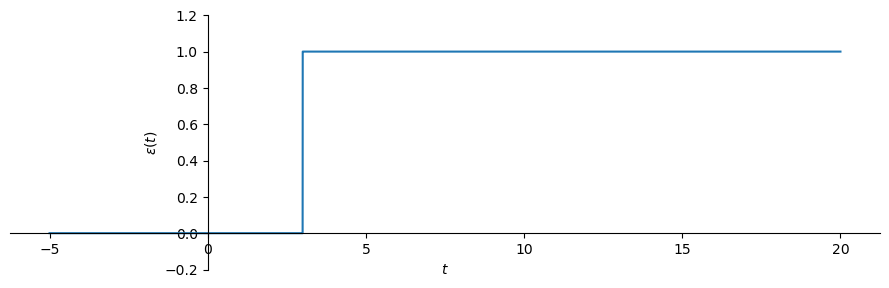

In [26]:
t = sym.symbols('t')
plt.rcParams['figure.figsize'] = 9, 3
sym.plot(sym.Heaviside(t-3), (t, -5, 20), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

**Ejercicio**

Construya una señal armónica de tiempo discreto que se "enciende" en el instante $k=3$. 



Text(0, 0.5, '$señal$')

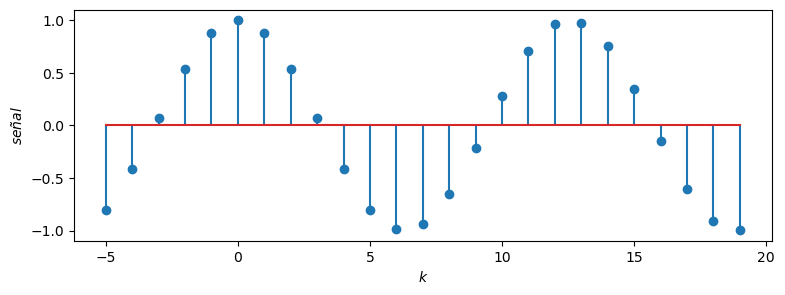

In [14]:
## Escriba su código aquí
y = np.cos(k*0.5)

plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$señal$')



Text(0, 0.5, '$x$')

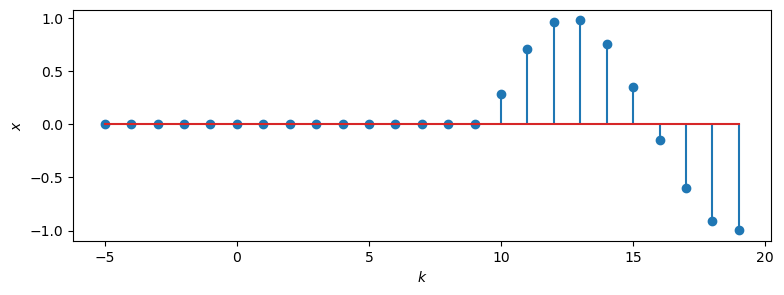

In [15]:
x = heaviside(k-10)

plt.stem(k, x*y)
plt.xlabel('$k$')
plt.ylabel('$x$')

### Señal signo


\begin{equation}
\text{sgn}[k] = \begin{cases} 1 & k>0 \\ 0 & k=0 \\ -1 & k < 0  \end{cases}
\end{equation}

Sirve para obtener el valor absoluto de $x[k]$

\begin{equation}
|x[k]| = x[k] \cdot \text{sgn}(x[k])
\end{equation}

Se relaciona con el escalón

\begin{equation}
\text{sgn}[k] = \epsilon[k] - \epsilon[-k]
\end{equation}

(-1.1, 1.1)

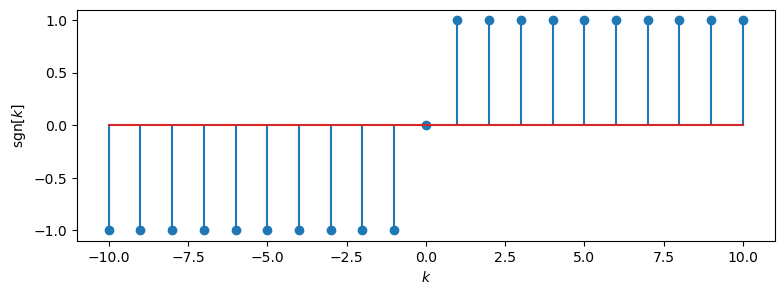

In [16]:
k = np.arange(-10, 11)
x = np.sign(k)

plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$\mathrm{sgn}[k]$')
plt.ylim([-1.1, 1.1])

Obtenga la señal signo a partir de escalones
\begin{equation}
\text{sgn}[k] = \epsilon[k] - \epsilon[-k]
\end{equation}

In [17]:
# Escriba su código


## Operaciones con señales


Las señales estándar permiten formar señales de estructuras más complejas mediante operaciones como la superposición, el desplazamiento temporal, el escalamiento, etc.

### Superposición

Considere que $x[k]$ es la superposición ponderada de las señales $x_\text{A}[k]$ y $x_\text{B}[k]$, es decir, la relación está dada por:

\begin{equation}
x[k] = A \cdot x_\text{A}[k] + B \cdot x_\text{B}[k]
\end{equation}

donde $A, B \in \mathbb{C}$.

**Ejercicio**

$x(t) = A \cdot \cos[\Omega_1 k] + B \cdot \cos[\Omega_2 k]$ con pesos $A$, $B$ y frecuencias normalizadas $\Omega_1$ y $\Omega_2$.

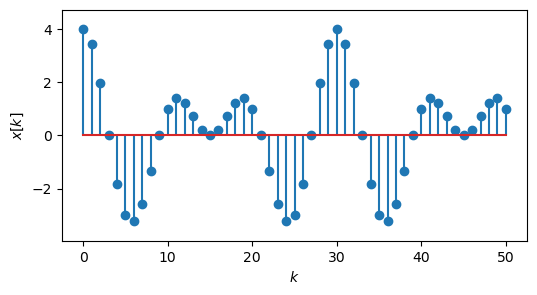

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

k = np.arange(0, 51)
x = 2*np.cos(2 * np.pi / 10 * k) + 2 * np.cos(2 * np.pi / 15 * k)

plt.figure(figsize=(6, 3))
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.gca().margins(y=0.1)

### Desplazamiento temporal
\begin{equation}
x[k] = s[k-\kappa]
\end{equation}

con $\kappa \in \mathbb{Z}$. La señal $s[k]$ tiene

* desplazamiento a la derecha $\kappa > 0$
* desplazamiento a la izquierda $\kappa < 0$

**Ejercicio**

Explique la forma de generar una señal [ diente de sierra](https://en.wikipedia.org/wiki/Sawtooth_wave) superponiendo rampas $k \cdot \text{rect}_N[k]$ desplazadas.




In [19]:
# Escriba su código


Explique el siguiente código

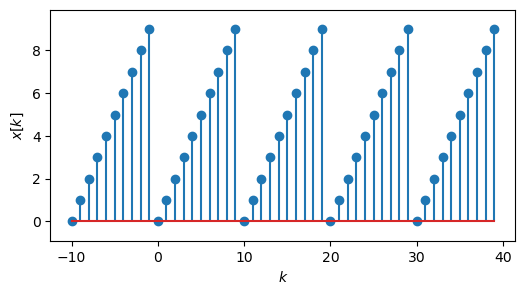

In [20]:
def sawtooth(k, N):
    return np.mod(k, N)

k = np.arange(-10, 40)
x = sawtooth(k, 10)

plt.figure(figsize=(6, 3))
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.gca().margins(y=0.1)